**Task-1: - Perform following operations on image-**

**1.   Image Resizing**

**2.   Image Blurring**



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread('/content/img1.jpeg')

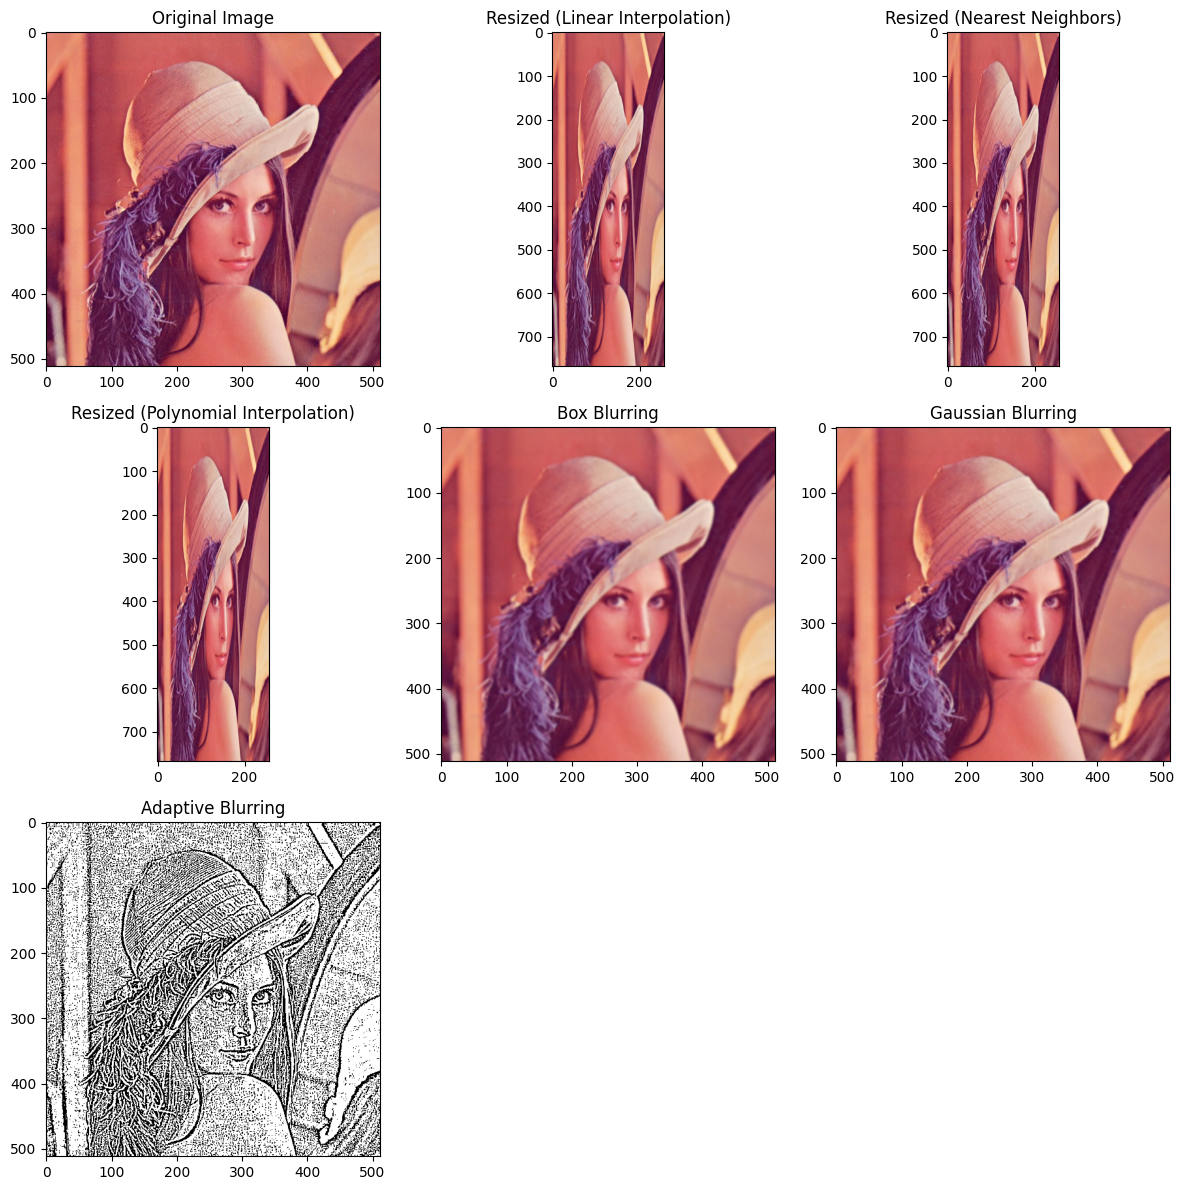

In [ ]:
# 1.1 Image Resizing (Interpolation Methods)
def resize_image(image, width, height, method):
    if method == 'linear':
        resized_image = cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR)
    elif method == 'nearest':
        resized_image = cv2.resize(image, (width, height), interpolation=cv2.INTER_NEAREST)
    elif method == 'polynomial':
        resized_image = cv2.resize(image, (width, height), interpolation=cv2.INTER_CUBIC)
    return resized_image

# 1.2 Image Blurring (Techniques)
def blur_image(image, technique, kernel_size=5):
    if technique == 'box':
        blurred_image = cv2.blur(image, (kernel_size, kernel_size))
    elif technique == 'gaussian':
        blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    elif technique == 'adaptive':
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, kernel_size, 2)
    return blurred_image

height, width, _ = image.shape

scale_x = 0.5
scale_y = 1.5

new_width = int(width * scale_x)
new_height = int(height * scale_y)

resized_image_linear = resize_image(image, new_width, new_height, 'linear')
resized_image_nearest = resize_image(image, new_width, new_height, 'nearest')
resized_image_polynomial = resize_image(image, new_width, new_height, 'polynomial')

blurred_image_box = blur_image(image, 'box')
blurred_image_gaussian = blur_image(image, 'gaussian')
blurred_image_adaptive = blur_image(image, 'adaptive')

plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(resized_image_linear, cv2.COLOR_BGR2RGB))
plt.title('Resized (Linear Interpolation)')

plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(resized_image_nearest, cv2.COLOR_BGR2RGB))
plt.title('Resized (Nearest Neighbors)')

plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(resized_image_polynomial, cv2.COLOR_BGR2RGB))
plt.title('Resized (Polynomial Interpolation)')

plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(blurred_image_box, cv2.COLOR_BGR2RGB))
plt.title('Box Blurring')

plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(blurred_image_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blurring')

plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(blurred_image_adaptive, cv2.COLOR_BGR2RGB))
plt.title('Adaptive Blurring')

plt.tight_layout()
plt.show()

**Task-2: - Apply Machine Learning Algorithm and find the model accuracy based on K-fold Cross Validation with (80-20 train-test split).**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report)
from sklearn.preprocessing import LabelBinarizer

In [ ]:
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist.data, mnist.target
X = X / 255.0
y = y.astype(int)

In [ ]:
print("Dataset Statistics:")
print(f"Total samples: {X.shape[0]}")
print(f"Total features: {X.shape[1]}")
print(f"Classes: {np.unique(y)}")

Dataset Statistics:
Total samples: 70000
Total features: 784
Classes: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Evaluating Random Forest...
Cross-validation Accuracy: 0.9673 (+/- 0.0006)


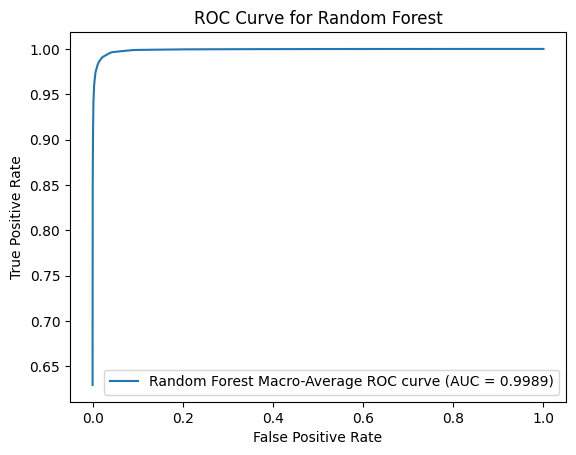


Evaluating Logistic Regression...
Cross-validation Accuracy: 0.9201 (+/- 0.0027)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


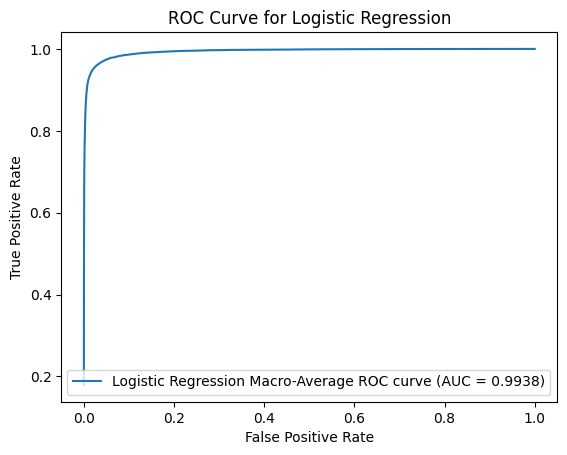

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', random_state=42)
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")

    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    print(f"Cross-validation Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test)
    if y_proba is not None:
        fpr, tpr, roc_auc = {}, {}, {}
        for i in range(len(lb.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(lb.classes_))]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(len(lb.classes_)):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= len(lb.classes_)

        fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        plt.figure()
        plt.plot(fpr["macro"], tpr["macro"], label=f"{name} Macro-Average ROC curve (AUC = {roc_auc['macro']:.4f})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve for {name}")
        plt.legend(loc="lower right")
        plt.show()

    else:
        roc_auc = "Not applicable"

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": cm,
        "AUC": roc_auc
    }

In [ ]:
for name, metrics in results.items():
    print(f"\n{name} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"AUC: {metrics['AUC']}\n")


Random Forest Results:
Accuracy: 0.9672
Precision: 0.9672
Recall: 0.9672
F1-Score: 0.9672
Confusion Matrix:
[[1371    1    0    0    1    0    2    0    5    1]
 [   0 1548    9    7    1    1    2    5    1    1]
 [   8    1 1350    3    6    1    7   14    7    1]
 [   3    1   14 1368    0   14    2   12   12    2]
 [   4    3    1    0 1312    0   10    0    4   31]
 [   5    1    2   17    3 1207   11    2    7    8]
 [   9    2    1    0    3    4 1350    0    6    0]
 [   1    5   13    0    9    0    0 1414    3   14]
 [   3    3    8    7    3   11    3    0 1308   19]
 [   8    7    1   16   18    4    1   12   11 1313]]
AUC: {0: 0.9996689302058738, 1: 0.9997554086423301, 2: 0.9991510760037862, 3: 0.9981146968809795, 4: 0.9988720210010278, 5: 0.9985350439747891, 6: 0.9997050585058507, 7: 0.9991271398831709, 8: 0.9987295595843281, 9: 0.9977275084341466, 'macro': 0.9989392290690496}


Logistic Regression Results:
Accuracy: 0.9211
Precision: 0.9208
Recall: 0.9211
F1-Score: 0.92

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = []

for train_idx, val_idx in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = Sequential([
        Dense(128, input_shape=(784,), activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

    y_val_pred_prob = model.predict(X_val_fold)
    y_val_pred = np.argmax(y_val_pred_prob, axis=1)

    acc = accuracy_score(y_val_fold, y_val_pred)
    precision = precision_score(y_val_fold, y_val_pred, average='macro')
    recall = recall_score(y_val_fold, y_val_pred, average='macro')
    f1 = f1_score(y_val_fold, y_val_pred, average='macro')
    conf_matrix = confusion_matrix(y_val_fold, y_val_pred)
    auc = roc_auc_score(y_val_fold, y_val_pred_prob, multi_class='ovr')

    fold_metrics.append({
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "Confusion Matrix": conf_matrix,
        "AUC": auc
    })

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
avg_metrics = {key: np.mean([fold[key] for fold in fold_metrics]) for key in fold_metrics[0] if key != "Confusion Matrix"}

print("Average Metrics Across Folds:")
for metric, value in avg_metrics.items():
    print(f"{metric}: {value:.4f}")

Average Metrics Across Folds:
Accuracy: 0.9750
Precision: 0.9749
Recall: 0.9747
F1: 0.9747
AUC: 0.9994


In [ ]:
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

roc_auc = roc_auc_score(y_test, y_test_pred_prob, multi_class='ovr', average='macro')

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step



Test Set Metrics:
Accuracy: 0.9771
Precision: 0.9771
Recall: 0.9769
F1 Score: 0.9770
Confusion Matrix:
[[1360    1    2    1    1    3    0    2   11    0]
 [   0 1554    6    3    1    0    2    6    2    1]
 [   2    3 1353   12    6    0    2    8   11    1]
 [   1    1    5 1399    0   10    0    3    6    3]
 [   2    4    1    0 1330    2    5    1    1   19]
 [   2    0    0    7    2 1217    8    0   12   15]
 [   6    4    0    1    4    5 1347    0    8    0]
 [   2    2    1    1    7    1    0 1430    2   13]
 [   1    4    1   11    0    6    4    1 1331    6]
 [   2    4    0    4    8    1    2    8    3 1359]]
AUC: 0.9995


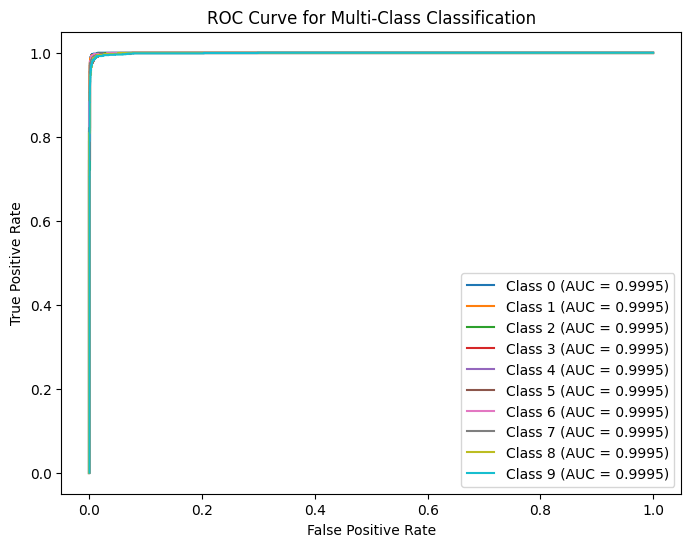

In [ ]:
print("\nTest Set Metrics:")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Confusion Matrix:\n{test_conf_matrix}")
print(f"AUC: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))

n_classes = 10
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_test_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.4f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Classification")
plt.legend()
plt.show()